In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Graph constructor
import seaborn as sns # Graph constructor

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/most-popular-1000-youtube-videos/Most popular 1000 Youtube videos.csv


**This is my first data science project in this plataform, i am not profissional in this area, but i want to be. Any error in my code, please, comment, is very important to me. In the future i will increments another functions in this code when i learning more about this area and the machine learning commands, thanks.**

**IMPORTING THE DATABASE**

In [2]:
df = pd.read_csv('/kaggle/input/most-popular-1000-youtube-videos/Most popular 1000 Youtube videos.csv')

**FIRST AND RAPID ANALISYS OF THE DATA**

In [3]:
df.head() # Verifying the first five elements of the data

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
1,2,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,David Kushner - Daylight (Official Music Video),"18,558,390","680,732",NaN,Music,2023
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,547,981,039","44,428,537",NaN,Music,2015


In [4]:
df.tail() # Verifying the last five elements of the data

,rank,Video,Video views,Likes,Dislikes,Category,published
995,996,New Champ Kayn/Rhaast Leak for LOL (Moobeat cr...,"847,249","1,857",173,People & Blogs,2017
996,997,Ford Mustang Launch (street),"1,001,605","2,214",27,Autos & Vehicles,2008
997,998,Eminem is gay - The Interview,"2,718,939","43,492",0,Entertainment,2014
998,999,Yakuza OST - Baka Mitai (ばかみたい) Kiryu full ver...,"52,890,986","850,425",0,Gaming,2017
999,1000,What a Twist #memes #shorts #movie,"11,637,337","938,043",NaN,Gaming,2024


In [5]:
df.info() # Verifying how much categorical and numeric elements present in the data
# Two elements type int and five type object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        1000 non-null   object
 4   Dislikes     527 non-null    object
 5   Category     982 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


**REPLACE COLUMNS IN OBJECT FORMAT FOR FLOAT AND INTEGERS**

In [6]:
df['Video views'] = df['Video views'].str.replace(',', '').astype(float)

In [7]:
df['Likes'] = df['Likes'].str.replace(',', '').astype(float)

In [8]:
df['Dislikes'] = df['Dislikes'].str.replace(',', '').astype(float)

In [9]:
# Verifying if the Dtype changed
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         1000 non-null   int64  
 1   Video        1000 non-null   object 
 2   Video views  1000 non-null   float64
 3   Likes        1000 non-null   float64
 4   Dislikes     527 non-null    float64
 5   Category     982 non-null    object 
 6   published    1000 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [10]:
df.describe() # Verifying if have any data above the expect

,rank,Video views,Likes,Dislikes,published
count,1000.000000,1.000000e+03,1.000000e+03,527.000000,1000.000000
mean,500.500000,2.453435e+07,3.685451e+05,2322.324478,2019.100000
std,288.819436,2.512570e+08,1.629418e+06,9653.170360,5.384328
min,1.000000,4.493900e+04,4.330000e+02,0.000000,2005.000000
25%,250.750000,9.815690e+05,9.427250e+03,200.000000,2017.000000
50%,500.500000,2.341652e+06,3.026200e+04,477.000000,2021.000000
75%,750.250000,1.162638e+07,1.649858e+05,1469.000000,2024.000000
max,1000.000000,6.547981e+09,4.442854e+07,178042.000000,2025.000000


In [11]:
df.shape # Verifying how much collumuns and lines have in the dataset

(1000, 7)

In [12]:
df.isnull().sum() # Verifying if have null values in the dataset
# Have null values in collumun Dislikes and in Category
# Is necessary tratament those values

rank             0
Video            0
Video views      0
Likes            0
Dislikes       473
Category        18
published        0
dtype: int64

In [13]:
df.duplicated().sum() # Verifying if have any duplicated value in the dataset

0

**ANALISYS OF THE NUMERIC DATA**

[Text(0.5, 1.0, 'Video views boxplot')]

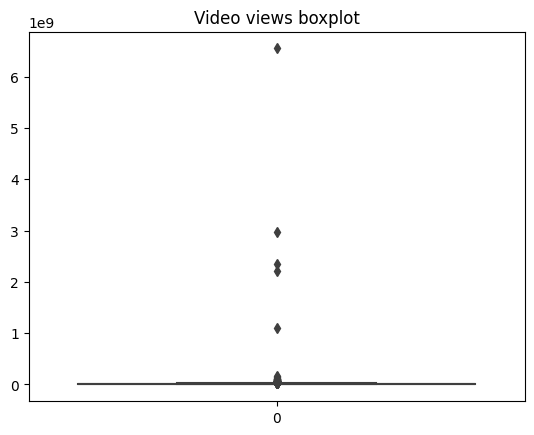

In [14]:
# Verifying the boxplot, many values above the median.
sns.boxplot(df['Video views']).set(title = 'Video views boxplot')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Video views Histplot')]

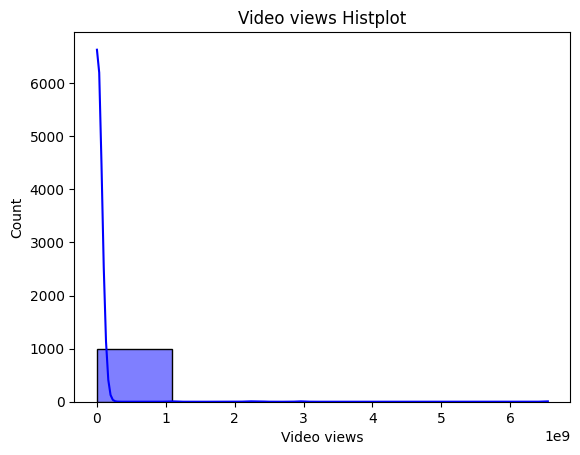

In [15]:
# Verifying the histplot graph to view the distribution of the data
sns.histplot(df['Video views'], kde = True, bins = 6, color = 'blue').set(title='Video views Histplot')

<Axes: >

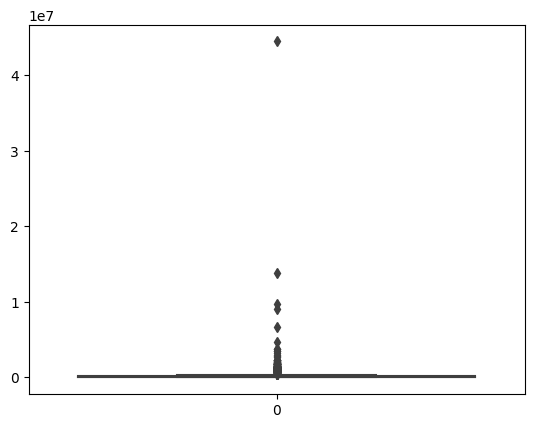

In [16]:
sns.boxplot(df['Likes'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Likes histplot')]

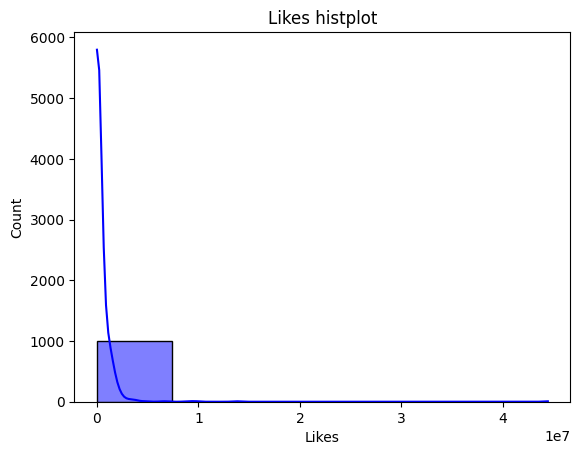

In [17]:
sns.histplot(df['Likes'], kde = True, bins = 6, color = 'blue').set(title='Likes histplot')

<Axes: >

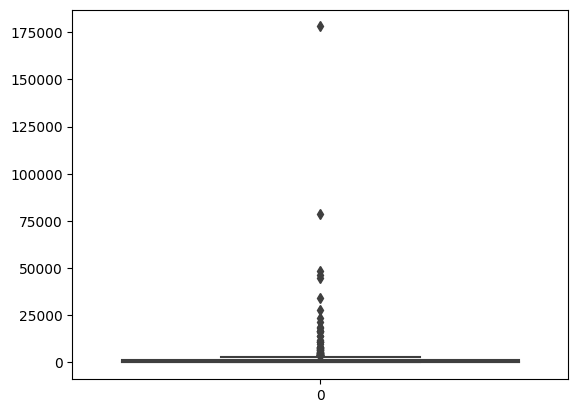

In [18]:
# Analisys of the column Dislikes, the biggest value and finding the null values
sns.boxplot(df['Dislikes'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Dislikes', ylabel='Count'>

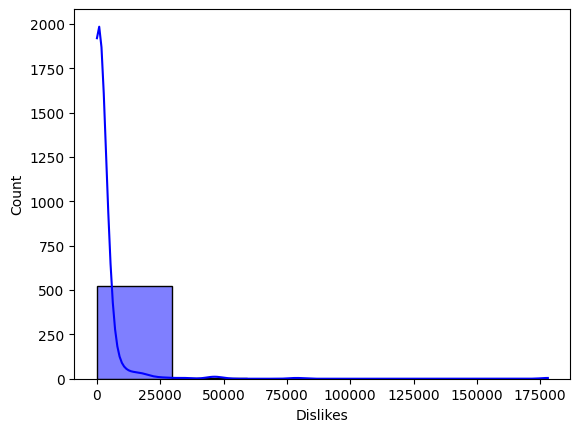

In [19]:
sns.histplot(df['Dislikes'], kde = True, bins = 6, color = 'blue')

In [20]:
df.loc[df['Dislikes'].isnull()]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,rank,Video,Video views,Likes,Dislikes,Category,published
2,3,JoJo Siwa - Karma (Official Video),3.420675e+07,293563.0,NaN,Music,2024
3,4,David Kushner - Daylight (Official Music Video),1.855839e+07,680732.0,NaN,Music,2023
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,6.547981e+09,44428537.0,NaN,Music,2015
6,7,JENNIE - ZEN (RUBY ALBUM MARCH 7),8.306465e+06,1261577.0,NaN,Music,2025
8,9,"Yovie Widianto, Lyodra, Tiara Andini, Ziva Mag...",1.389490e+07,452087.0,NaN,Music,2023
...,...,...,...,...,...,...,...
990,991,Please tell me I did a good job 🥹❤️ #art,1.431007e+07,801435.0,NaN,People & Blogs,2024
991,992,“I know what I’m doing.” Famous last words! | ...,6.499230e+07,1615193.0,NaN,Film & Animation,2024
992,993,Samsung mocking Apple 😂💀 #blowup #apple #samsu...,3.550869e+07,2324673.0,NaN,People & Blogs,2024
993,994,다이소에서 산 장난감,2.975425e+07,960096.0,NaN,Pets & Animals,2025


In [21]:
# Analisys of the column Category, the biggest value and finding the null values
group = df.groupby('Category').size().sort_values(ascending=False)
group

Category
Music                    431
People & Blogs           257
Entertainment             81
Comedy                    53
Sports                    35
Film & Animation          29
Gaming                    22
Autos & Vehicles          19
Pets & Animals            18
News & Politics           14
Education                  5
Nonprofits & Activism      5
Science & Technology       5
Howto & Style              4
Travel & Events            4
dtype: int64

In [22]:
df.loc[df['Category'].isnull()]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,rank,Video,Video views,Likes,Dislikes,Category,published
1,2,"20 Tennis shots if they were not filmed, NOBOD...",3471237.0,19023.0,859.0,NaN,2017
109,110,"ILLENIUM, Jon Bellion - Good Things Fall Apart",10358663.0,169009.0,3138.0,NaN,2019
257,258,Bryan Behr - De Todos Os Amores,684366.0,12586.0,35.0,NaN,2020
302,303,Танк Армата,3954302.0,4636.0,1033.0,NaN,2015
318,319,A Needed Response,11622727.0,39804.0,1872.0,NaN,2013
322,323,perfekte welle,2337888.0,4430.0,174.0,NaN,2005
342,343,westerland,5289591.0,8542.0,269.0,NaN,2006
349,350,Phoenix - Lisztomania - Boston University Brat...,3824693.0,15236.0,858.0,NaN,2010
364,365,"Rels B, Morad - NO TE IMAGINAS",2930422.0,124350.0,2668.0,NaN,2020
371,372,#joerogan #jre #cooking #steak,1709040.0,64601.0,NaN,NaN,2023


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Category Histplot')]

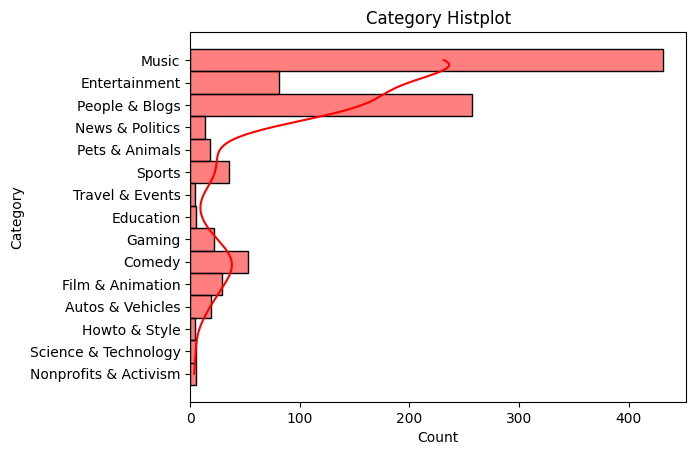

In [23]:
sns.histplot(data = df, y = df['Category'], kde = True, bins = 6, color = 'red').set(title='Category Histplot')

**TRATAMENT OF THE NULL VALUES USING USING THE MEDIAN AND MOST FREQUENTLY CATEGORY FOR REPLACE VALUE**

In [24]:
# Calculating the median of the dislikes 
median_dislike = df['Dislikes'].median()
median_dislike

477.0

In [25]:
# Replacing in the null values for median
df.fillna({'Dislikes' : median_dislike}, inplace = True)

In [26]:
# Verifying if not exist more null values in the Dislikes column
df['Dislikes'].isnull().sum()

0

In [27]:
# Replacing in the null values of the Category column to the category more frequent
df.fillna({'Category' : 'Music'}, inplace = True)

In [28]:
# Verifying if not exist more null values in the Category column
df['Category'].isnull().sum()

0

**VERIFYING ANOTHER INFOS USING THE COMMAND GROUPBY**

In [29]:
group_by_year_and_views = df.groupby('published')['Video views'].sum()
group_by_year_and_views

published
2005    5.388652e+06
2006    2.527379e+08
2007    3.358325e+08
2008    2.668532e+08
2009    1.106698e+08
2010    4.490541e+07
2011    1.902996e+08
2012    6.965536e+07
2013    1.048277e+08
2014    1.530757e+08
2015    6.607602e+09
2016    1.576750e+08
2017    2.960561e+08
2018    4.100840e+09
2019    4.730725e+09
2020    9.095818e+07
2021    1.139685e+08
2022    1.706687e+08
2023    8.528820e+08
2024    4.772801e+09
2025    1.105924e+09
Name: Video views, dtype: float64

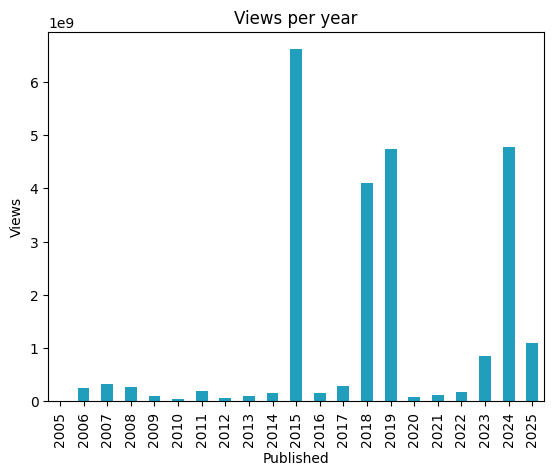

In [30]:
# Showing the calculation of the views per year through to graph
group_by_year_and_views.plot(kind='bar',title = 'Views per year', color = '#219ebc')
plt.xlabel('Published')
plt.ylabel('Views')
plt.show()

In [31]:
group_by_like_and_category = df.groupby('Category')['Likes'].sum().sort_values(ascending=False)
group_by_like_and_category

Category
People & Blogs           141114842.0
Music                    127172142.0
Entertainment             38038916.0
Film & Animation          17658369.0
Sports                    13917184.0
Gaming                     9503368.0
Autos & Vehicles           6482119.0
Travel & Events            2999533.0
Howto & Style              2802331.0
Comedy                     2711499.0
Pets & Animals             2693752.0
Science & Technology       2363819.0
Education                   914747.0
News & Politics             134638.0
Nonprofits & Activism        37844.0
Name: Likes, dtype: float64

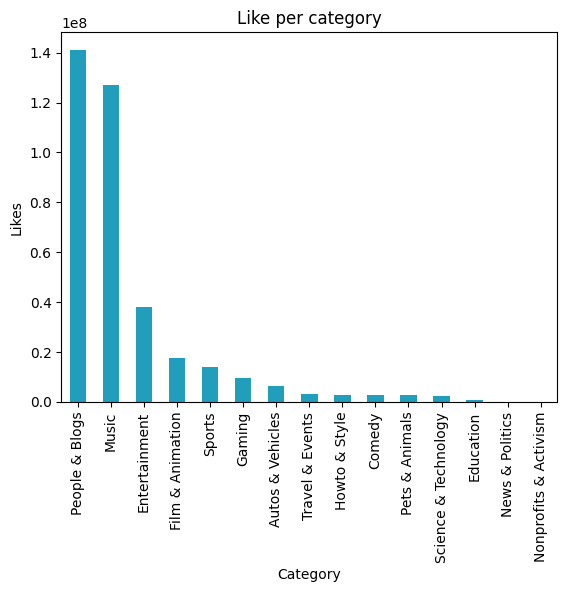

In [32]:
# Verifying wich the most visualized categorys
group_by_like_and_category.plot(kind='bar',title='Like per category',color='#219ebc')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.show()

**FINAL VISUALIZATION ON THE CORRECTED DATASET**

In [33]:
df.head()

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,5.407168e+07,3497955.0,78799.0,Music,2019
1,2,"20 Tennis shots if they were not filmed, NOBOD...",3.471237e+06,19023.0,859.0,Music,2017
2,3,JoJo Siwa - Karma (Official Video),3.420675e+07,293563.0,477.0,Music,2024
3,4,David Kushner - Daylight (Official Music Video),1.855839e+07,680732.0,477.0,Music,2023
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,6.547981e+09,44428537.0,477.0,Music,2015


In [34]:
df.isnull().sum()

rank           0
Video          0
Video views    0
Likes          0
Dislikes       0
Category       0
published      0
dtype: int64

**FINAL CONCLUTIONS**

***1 - The category more visualizated is People and blogs, if you compared with the reality, this is very commun.
2 - The youtube in 2015 is more visualizated videos, this is true, because in this date, very people starting used this plataform.
3 - The category with more channels is Music.***